In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

In [510]:
df = pd.read_csv('/Users/butler/Downloads/ufos/scrubbed.csv')


/var/folders/nv/lggm200n09vgfy5n8_6lcz6c0000gn/T/ipykernel_1977/2461157267.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/butler/Downloads/ufos/scrubbed.csv')


In [511]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [513]:
df['shape'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', nan, 'delta', 'changing', 'egg',
       'diamond', 'flash', 'teardrop', 'cone', 'cross', 'pyramid',
       'round', 'crescent', 'flare', 'hexagon', 'dome', 'changed'],
      dtype=object)

In [514]:
df['shape'] = df['shape'].replace('changed', 'changing')
df['shape'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', nan, 'delta', 'changing', 'egg',
       'diamond', 'flash', 'teardrop', 'cone', 'cross', 'pyramid',
       'round', 'crescent', 'flare', 'hexagon', 'dome'], dtype=object)

In [515]:
df['shape'] = df['shape'].replace('other', 'unknown')
df['shape'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'cigar', 'rectangle', 'chevron', 'triangle',
       'formation', nan, 'delta', 'changing', 'egg', 'diamond', 'flash',
       'teardrop', 'cone', 'cross', 'pyramid', 'round', 'crescent',
       'flare', 'hexagon', 'dome'], dtype=object)

In [516]:
df.isnull()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
80327,False,False,False,False,False,False,False,False,False,False,False
80328,False,False,False,False,False,False,False,False,False,False,False
80329,False,False,False,False,False,False,False,False,False,False,False
80330,False,False,False,False,False,False,False,False,False,False,False


In [517]:
df['shape'] = df['shape'].fillna('other')

In [518]:
df['shape'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'cigar', 'rectangle', 'chevron', 'triangle',
       'formation', 'other', 'delta', 'changing', 'egg', 'diamond',
       'flash', 'teardrop', 'cone', 'cross', 'pyramid', 'round',
       'crescent', 'flare', 'hexagon', 'dome'], dtype=object)

In [519]:
df.shape

(80332, 11)

In [520]:
df['country'].unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [521]:
df['country'].isnull().value_counts()

False    70662
True      9670
Name: country, dtype: int64

In [522]:
df['city'].unique()

array(['san marcos', 'lackland afb', 'chester (uk/england)', ...,
       'calmar (canada)', 'aleksandrow (poland)', 'hamstead (hollyridge)'],
      dtype=object)

In [523]:
df['city'].nunique()

19900

In [524]:
df['country'].isnull().value_counts()

False    70662
True      9670
Name: country, dtype: int64

In [525]:
df[df['country'].isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
18,10/10/1973 23:00,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,1/11/2002,32.364167,-64.678611
29,10/10/1979 22:00,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,1/19/2005,53.970571,-111.689885
35,10/10/1982 07:00,gisborne (new zealand),NaN,NaN,disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,1/11/2002,-38.662334,178.017649
40,10/10/1986 20:00,holmes/pawling,ny,NaN,chevron,180,3 minutes,Football Field Sized Chevron with bright white...,10/8/2007,41.523427,-73.646795
...,...,...,...,...,...,...,...,...,...,...,...
80238,9/9/2009 14:15,broomfield?lafayette,co,NaN,rectangle,120.0,2 min,Large&#44 rectangular object seen flying in br...,12/12/2009,39.993596,-105.089706
80244,9/9/2009 20:17,lyman,me,NaN,light,600.0,10 mins,Two lights ran across the sky&#44 as bright as...,12/12/2009,43.505096,-70.637968
80319,9/9/2013 20:15,clifton,nj,NaN,unknown,3600.0,~1hr+,Luminous line seen in New Jersey sky.,9/30/2013,40.858433,-74.163755
80322,9/9/2013 21:00,aleksandrow (poland),NaN,NaN,light,15.0,15 seconds,Two points of light following one another in a...,9/30/2013,50.465843,22.891814


In [526]:
df['country'].isnull().value_counts()

False    70662
True      9670
Name: country, dtype: int64

In [527]:
df[df['country'].isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
18,10/10/1973 23:00,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,1/11/2002,32.364167,-64.678611
29,10/10/1979 22:00,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,1/19/2005,53.970571,-111.689885
35,10/10/1982 07:00,gisborne (new zealand),NaN,NaN,disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,1/11/2002,-38.662334,178.017649
40,10/10/1986 20:00,holmes/pawling,ny,NaN,chevron,180,3 minutes,Football Field Sized Chevron with bright white...,10/8/2007,41.523427,-73.646795
...,...,...,...,...,...,...,...,...,...,...,...
80238,9/9/2009 14:15,broomfield?lafayette,co,NaN,rectangle,120.0,2 min,Large&#44 rectangular object seen flying in br...,12/12/2009,39.993596,-105.089706
80244,9/9/2009 20:17,lyman,me,NaN,light,600.0,10 mins,Two lights ran across the sky&#44 as bright as...,12/12/2009,43.505096,-70.637968
80319,9/9/2013 20:15,clifton,nj,NaN,unknown,3600.0,~1hr+,Luminous line seen in New Jersey sky.,9/30/2013,40.858433,-74.163755
80322,9/9/2013 21:00,aleksandrow (poland),NaN,NaN,light,15.0,15 seconds,Two points of light following one another in a...,9/30/2013,50.465843,22.891814


In [528]:
df['country'].isnull().value_counts()

False    70662
True      9670
Name: country, dtype: int64

In [529]:
df[df['country'].isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
18,10/10/1973 23:00,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,1/11/2002,32.364167,-64.678611
29,10/10/1979 22:00,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,1/19/2005,53.970571,-111.689885
35,10/10/1982 07:00,gisborne (new zealand),NaN,NaN,disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,1/11/2002,-38.662334,178.017649
40,10/10/1986 20:00,holmes/pawling,ny,NaN,chevron,180,3 minutes,Football Field Sized Chevron with bright white...,10/8/2007,41.523427,-73.646795
...,...,...,...,...,...,...,...,...,...,...,...
80238,9/9/2009 14:15,broomfield?lafayette,co,NaN,rectangle,120.0,2 min,Large&#44 rectangular object seen flying in br...,12/12/2009,39.993596,-105.089706
80244,9/9/2009 20:17,lyman,me,NaN,light,600.0,10 mins,Two lights ran across the sky&#44 as bright as...,12/12/2009,43.505096,-70.637968
80319,9/9/2013 20:15,clifton,nj,NaN,unknown,3600.0,~1hr+,Luminous line seen in New Jersey sky.,9/30/2013,40.858433,-74.163755
80322,9/9/2013 21:00,aleksandrow (poland),NaN,NaN,light,15.0,15 seconds,Two points of light following one another in a...,9/30/2013,50.465843,22.891814


In [530]:
df[df['country'].isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
18,10/10/1973 23:00,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,1/11/2002,32.364167,-64.678611
29,10/10/1979 22:00,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,1/19/2005,53.970571,-111.689885
35,10/10/1982 07:00,gisborne (new zealand),NaN,NaN,disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,1/11/2002,-38.662334,178.017649
40,10/10/1986 20:00,holmes/pawling,ny,NaN,chevron,180,3 minutes,Football Field Sized Chevron with bright white...,10/8/2007,41.523427,-73.646795
...,...,...,...,...,...,...,...,...,...,...,...
80238,9/9/2009 14:15,broomfield?lafayette,co,NaN,rectangle,120.0,2 min,Large&#44 rectangular object seen flying in br...,12/12/2009,39.993596,-105.089706
80244,9/9/2009 20:17,lyman,me,NaN,light,600.0,10 mins,Two lights ran across the sky&#44 as bright as...,12/12/2009,43.505096,-70.637968
80319,9/9/2013 20:15,clifton,nj,NaN,unknown,3600.0,~1hr+,Luminous line seen in New Jersey sky.,9/30/2013,40.858433,-74.163755
80322,9/9/2013 21:00,aleksandrow (poland),NaN,NaN,light,15.0,15 seconds,Two points of light following one another in a...,9/30/2013,50.465843,22.891814


In [531]:
df[df['country'].isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
18,10/10/1973 23:00,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,1/11/2002,32.364167,-64.678611
29,10/10/1979 22:00,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,1/19/2005,53.970571,-111.689885
35,10/10/1982 07:00,gisborne (new zealand),NaN,NaN,disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,1/11/2002,-38.662334,178.017649
40,10/10/1986 20:00,holmes/pawling,ny,NaN,chevron,180,3 minutes,Football Field Sized Chevron with bright white...,10/8/2007,41.523427,-73.646795
...,...,...,...,...,...,...,...,...,...,...,...
80238,9/9/2009 14:15,broomfield?lafayette,co,NaN,rectangle,120.0,2 min,Large&#44 rectangular object seen flying in br...,12/12/2009,39.993596,-105.089706
80244,9/9/2009 20:17,lyman,me,NaN,light,600.0,10 mins,Two lights ran across the sky&#44 as bright as...,12/12/2009,43.505096,-70.637968
80319,9/9/2013 20:15,clifton,nj,NaN,unknown,3600.0,~1hr+,Luminous line seen in New Jersey sky.,9/30/2013,40.858433,-74.163755
80322,9/9/2013 21:00,aleksandrow (poland),NaN,NaN,light,15.0,15 seconds,Two points of light following one another in a...,9/30/2013,50.465843,22.891814


In [532]:
df.loc[df.state == 'il', 'country'] = 'us'
df.loc[df.state == 'ky', 'country'] = 'us'
df.loc[df.state == 'mo', 'country'] = 'us'
df.loc[df.state == 'ma', 'country'] = 'us'
df.loc[df.state == 'mi', 'country'] = 'us'
df.loc[df.state == 'nh', 'country'] = 'us'
df.loc[df.state == 'al', 'country'] = 'us'
df.loc[df.state == 'ak', 'country'] = 'us'
df.loc[df.state == 'ar', 'country'] = 'us'
df.loc[df.state == 'ca', 'country'] = 'us'
df.loc[df.state == 'co', 'country'] = 'us'
df.loc[df.state == 'la', 'country'] = 'us'
df.loc[df.state == 'mn', 'country'] = 'us'
df.loc[df.state == 'ms', 'country'] = 'us'
df.loc[df.state == 'mt', 'country'] = 'us'
df.loc[df.state == 'ne', 'country'] = 'us'
df.loc[df.state == 'ma', 'country'] = 'us'
df.loc[df.state == 'mi', 'country'] = 'us'
df.loc[df.state == 'nh', 'country'] = 'us'
df.loc[df.state == 'nj', 'country'] = 'us'
df.loc[df.state == 'nd', 'country'] = 'us'
df.loc[df.state == 'ny', 'country'] = 'us'
df.loc[df.state == 'oh', 'country'] = 'us'
df.loc[df.state == 'ok', 'country'] = 'us'
df.loc[df.state == 'or', 'country'] = 'us'
df.loc[df.state == 'pr', 'country'] = 'us'
df.loc[df.state == 'ri', 'country'] = 'us'
df.loc[df.state == 'sc', 'country'] = 'us'
df.loc[df.state == 'tn', 'country'] = 'us'
df.loc[df.state == 'ut', 'country'] = 'us'
df.loc[df.state == 'vt', 'country'] = 'us'
df.loc[df.state == 'vi', 'country'] = 'us'
df.loc[df.state == 'wa', 'country'] = 'us'
df.loc[df.state == 'wv', 'country'] = 'us'
df.loc[df.state == 'wi', 'country'] = 'us'
df.loc[df.state == 'wy', 'country'] = 'us'
df.loc[df.state == 'va', 'country'] = 'us'
df.loc[df.state == 'md', 'country'] = 'us'
df.loc[df.state == 'wi', 'country'] = 'us'
df.loc[df.state == 'pa', 'country'] = 'us'
df.loc[df.state == 'nm', 'country'] = 'us'
df.loc[df.state == 'ga', 'country'] = 'us'
df.loc[df.state == 'ma', 'country'] = 'us'
df.loc[df.state == 'mi', 'country'] = 'us'
df.loc[df.state == 'nh', 'country'] = 'us'
df.loc[df.state == 'al', 'country'] = 'us'
df.loc[df.state == 'ak', 'country'] = 'us'
df.loc[df.state == 'ar', 'country'] = 'us'
df.loc[df.state == 'co', 'country'] = 'us'
df.loc[df.state == 'la', 'country'] = 'us'
df.loc[df.state == 'mn', 'country'] = 'us'
df.loc[df.state == 'ms', 'country'] = 'us'
df.loc[df.state == 'mt', 'country'] = 'us'
df.loc[df.state == 'ne', 'country'] = 'us'
df.loc[df.state == 'ma', 'country'] = 'us'
df.loc[df.state == 'mi', 'country'] = 'us'
df.loc[df.state == 'nh', 'country'] = 'us'
df.loc[df.state == 'nj', 'country'] = 'us'
df.loc[df.state == 'nd', 'country'] = 'us'
df.loc[df.state == 'oh', 'country'] = 'us'
df.loc[df.state == 'ok', 'country'] = 'us'
df.loc[df.state == 'or', 'country'] = 'us'
df.loc[df.state == 'pr', 'country'] = 'us'
df.loc[df.state == 'ri', 'country'] = 'us'
df.loc[df.state == 'sc', 'country'] = 'us'
df.loc[df.state == 'tn', 'country'] = 'us'
df.loc[df.state == 'ut', 'country'] = 'us'
df.loc[df.state == 'vt', 'country'] = 'us'
df.loc[df.state == 'vi', 'country'] = 'us'
df.loc[df.state == 'wa', 'country'] = 'us'
df.loc[df.state == 'wv', 'country'] = 'us'
df.loc[df.state == 'wi', 'country'] = 'us'
df.loc[df.state == 'wy', 'country'] = 'us'
df.loc[df.state == 'tx', 'country'] = 'us'

df.loc[df.state == 'fl', 'country'] = 'us'
df.loc[df.state == 'nj', 'country'] = 'us'
df.loc[df.state == 'me', 'country'] = 'us'
df.loc[df.state == 'nc', 'country'] = 'us'
df.loc[df.state == 'co', 'country'] = 'us'
df.loc[df.state == 'az', 'country'] = 'us'


In [533]:
df[df['country'].isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
18,10/10/1973 23:00,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,1/11/2002,32.364167,-64.678611
29,10/10/1979 22:00,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,1/19/2005,53.970571,-111.689885
35,10/10/1982 07:00,gisborne (new zealand),NaN,NaN,disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,1/11/2002,-38.662334,178.017649
55,10/10/1993 03:00,zlatoust (russia),NaN,NaN,sphere,1200,20 minutes,I woke up at night and looked out the window n...,12/14/2004,55.183333,59.650000
65,10/10/1996 20:00,lake macquarie (nsw&#44 australia),NaN,NaN,light,300,5 min,RED LIGHT WITH OTHER RED FLASHING LIGHT&#44 ON...,5/24/1999,-33.093373,151.588982
...,...,...,...,...,...,...,...,...,...,...,...
80157,9/9/2002 19:30,thailand (northeast),NaN,NaN,changing,600.0,5-10 mins,you can see or documented another type ball of...,10/15/2002,15.870032,100.992541
80190,9/9/2004 21:00,dubai (uae),NaN,NaN,disk,15.0,15 secs,silver&#44 disk shaped object with lights surr...,9/29/2004,25.047664,55.181741
80194,9/9/2004 21:45,krimpen a/d ijssel (netherlands),NaN,NaN,light,5.0,5 sec,Two fast as a couple moving red lights,9/29/2004,51.915929,4.600337
80204,9/9/2005 21:00,sault ste. marie (canada),on,NaN,unknown,10.0,5 to 10 seconds,I witnessed a low-flying&#44 flat and round&#4...,10/11/2005,46.521858,-84.346090


In [534]:
df[df['country'].isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
18,10/10/1973 23:00,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,1/11/2002,32.364167,-64.678611
29,10/10/1979 22:00,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,1/19/2005,53.970571,-111.689885
35,10/10/1982 07:00,gisborne (new zealand),NaN,NaN,disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,1/11/2002,-38.662334,178.017649
55,10/10/1993 03:00,zlatoust (russia),NaN,NaN,sphere,1200,20 minutes,I woke up at night and looked out the window n...,12/14/2004,55.183333,59.650000
65,10/10/1996 20:00,lake macquarie (nsw&#44 australia),NaN,NaN,light,300,5 min,RED LIGHT WITH OTHER RED FLASHING LIGHT&#44 ON...,5/24/1999,-33.093373,151.588982
...,...,...,...,...,...,...,...,...,...,...,...
80157,9/9/2002 19:30,thailand (northeast),NaN,NaN,changing,600.0,5-10 mins,you can see or documented another type ball of...,10/15/2002,15.870032,100.992541
80190,9/9/2004 21:00,dubai (uae),NaN,NaN,disk,15.0,15 secs,silver&#44 disk shaped object with lights surr...,9/29/2004,25.047664,55.181741
80194,9/9/2004 21:45,krimpen a/d ijssel (netherlands),NaN,NaN,light,5.0,5 sec,Two fast as a couple moving red lights,9/29/2004,51.915929,4.600337
80204,9/9/2005 21:00,sault ste. marie (canada),on,NaN,unknown,10.0,5 to 10 seconds,I witnessed a low-flying&#44 flat and round&#4...,10/11/2005,46.521858,-84.346090


In [535]:
df.drop(['duration (hours/min)', 'latitude', 'longitude '], axis=1, inplace=True)
df.head()

,datetime,city,state,country,shape,duration (seconds),comments,date posted
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,4/27/2004
1,10/10/1949 21:00,lackland afb,tx,us,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,1/21/2008
3,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,1/17/2004
4,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004


In [536]:
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'comments', 'date posted'],
      dtype='object')

In [537]:
df.head()

,datetime,city,state,country,shape,duration (seconds),comments,date posted
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,4/27/2004
1,10/10/1949 21:00,lackland afb,tx,us,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,1/21/2008
3,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,1/17/2004
4,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004


In [538]:
df.tail()

,datetime,city,state,country,shape,duration (seconds),comments,date posted
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,Round from the distance/slowly changing colors...,9/30/2013
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013
80329,9/9/2013 22:00,napa,ca,us,unknown,1200.0,Napa UFO&#44,9/30/2013
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,Saw a five gold lit cicular craft moving fastl...,9/30/2013
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020.0,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013


In [539]:
df.drop(['comments', 'date posted'], axis=1, inplace=True)

In [540]:
df.head()

,datetime,city,state,country,shape,duration (seconds)
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700
1,10/10/1949 21:00,lackland afb,tx,us,light,7200
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20
3,10/10/1956 21:00,edna,tx,us,circle,20
4,10/10/1960 20:00,kaneohe,hi,us,light,900


In [541]:
df.tail()

,datetime,city,state,country,shape,duration (seconds)
80327,9/9/2013 21:15,nashville,tn,us,light,600.0
80328,9/9/2013 22:00,boise,id,us,circle,1200.0
80329,9/9/2013 22:00,napa,ca,us,unknown,1200.0
80330,9/9/2013 22:20,vienna,va,us,circle,5.0
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020.0


In [542]:
a = []
m = []
for i in range(80332):
    d = df.iloc[i,0] 
    if '/' in d[0:2]:
        m.append(int((d[0])))
        if '/' in d[2:4]:
            a.append(int(d[4:8]))
            
        else:
            a.append(int(d[5:9]))
            
    else: 
        m.append(int(d[0:2]))
        if '/' in d[3:5]:
            a.append(int(d[5:9]))
            
        else:
            a.append(int(d[6:10]))

In [543]:
df['year'] = pd.Series(a)
df['month'] = pd.Series(m)

In [544]:
df.sort_values(by='year', inplace=True)
df.reset_index(drop=True, inplace=True)

In [545]:
df.head()

,datetime,city,state,country,shape,duration (seconds),year,month
0,11/11/1906 00:00,wien (austria),NaN,NaN,unknown,10800,1906,11
1,6/1/1910 15:00,wills point,tx,us,cigar,120,1910,6
2,1/1/1910 24:00,kirksville (near),mo,us,disk,120,1910,1
3,4/5/1916 13:00,france (above; from aircraft),NaN,NaN,cigar,60,1916,4
4,6/11/1920 21:00,cicero,in,us,unknown,60,1920,6


In [546]:
df.tail()

,datetime,city,state,country,shape,duration (seconds),year,month
80327,4/26/2014 20:43,whittier,ca,us,fireball,120,2014,4
80328,4/26/2014 20:15,riverside,nj,us,diamond,120,2014,4
80329,4/26/2014 19:00,gilbert,az,us,triangle,60,2014,4
80330,4/26/2014 17:00,greenwood,in,us,cross,20,2014,4
80331,3/13/2014 22:20,henderson,nv,us,light,1800,2014,3


In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   datetime            80332 non-null  object
 1   city                80332 non-null  object
 2   state               74535 non-null  object
 3   country             75885 non-null  object
 4   shape               80332 non-null  object
 5   duration (seconds)  80332 non-null  object
 6   year                80332 non-null  int64 
 7   month               80332 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 4.9+ MB


In [548]:
df["us"] = df["country"] == "us"
df["not_us"] = df["country"] != "us"
df["us"].astype(int)
df["not_us"].astype(int)

0        1
1        0
2        0
3        1
4        0
        ..
80327    0
80328    0
80329    0
80330    0
80331    0
Name: not_us, Length: 80332, dtype: int64

In [549]:
df_us = df[df["country"] == 'us']
df_non_us = df[df["country"] != 'us']
df_us.reset_index(drop=True, inplace=True)
df_non_us.reset_index(drop=True, inplace=True)
df_us.head()

,datetime,city,state,country,shape,duration (seconds),year,month,us,not_us
0,6/1/1910 15:00,wills point,tx,us,cigar,120,1910,6,True,False
1,1/1/1910 24:00,kirksville (near),mo,us,disk,120,1910,1,True,False
2,6/11/1920 21:00,cicero,in,us,unknown,60,1920,6,True,False
3,12/28/1925 18:00,atkinson (6 miles north of),il,us,disk,60,1925,12,True,False
4,7/5/1929 14:00,buchanan (or burns),or,us,disk,60,1929,7,True,False


In [550]:
df_non_us.head()

,datetime,city,state,country,shape,duration (seconds),year,month,us,not_us
0,11/11/1906 00:00,wien (austria),NaN,NaN,unknown,10800,1906,11,False,True
1,4/5/1916 13:00,france (above; from aircraft),NaN,NaN,cigar,60,1916,4,False,True
2,9/15/1936 19:00,albany (canada),pe,ca,rectangle,1200.0,1936,9,False,True
3,6/1/1943 19:00,norfolk/sizewell (uk/england),NaN,NaN,cigar,600,1943,6,False,True
4,6/8/1943 14:00,france (over&#44 somewhere),NaN,NaN,light,300,1943,6,False,True


In [551]:
ycount_us = df_us['year'].value_counts()
ycount_us


2012    6699
2013    6439
2011    4720
2008    4291
2009    3941
        ... 
1933       1
1930       1
1929       1
1925       1
1920       1
Name: year, Length: 85, dtype: int64

In [552]:
ycount_non_us = df_non_us['year'].value_counts()
ycount_non_us

2003    775
2004    742
2012    658
2009    600
2013    598
       ... 
1948      1
1945      1
1916      1
1936      1
1906      1
Name: year, Length: 74, dtype: int64

In [553]:
year = df_us['year'].unique()

year_us = year[::-1]
year_us


array([2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982,
       1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971,
       1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960,
       1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949,
       1948, 1947, 1946, 1945, 1944, 1943, 1942, 1941, 1939, 1937, 1936,
       1934, 1933, 1931, 1930, 1929, 1925, 1920, 1910])

In [554]:
df_us_1950 = df_us[df_us['year'] < 1951]
year = df_us_1950['year'].unique()
year_us_1950 = year[::-1]
ycount_us_1950 = df_us_1950['year'].value_counts()
ycount_us_1950

1947    35
1950    26
1949    16
1946     8
1945     8
1948     7
1944     6
1943     5
1939     3
1937     2
1942     2
1931     2
1910     2
1920     1
1941     1
1936     1
1934     1
1933     1
1930     1
1929     1
1925     1
Name: year, dtype: int64

In [555]:
df_non_us_1950 = df_non_us[df_non_us['year'] < 1951]
year = df_non_us_1950['year'].unique()
year_non_us_1950 = year[::-1]

ycount_non_us_1950 = df_non_us_1950['year'].value_counts()
ycount_non_us_1950

1943    4
1944    3
1946    2
1947    2
1950    2
1906    1
1916    1
1936    1
1945    1
1948    1
Name: year, dtype: int64

In [556]:
year = df_non_us['year'].unique()
year_non_us = year[::-1]
year_non_us

array([2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982,
       1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971,
       1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960,
       1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1948,
       1947, 1946, 1945, 1944, 1943, 1936, 1916, 1906])

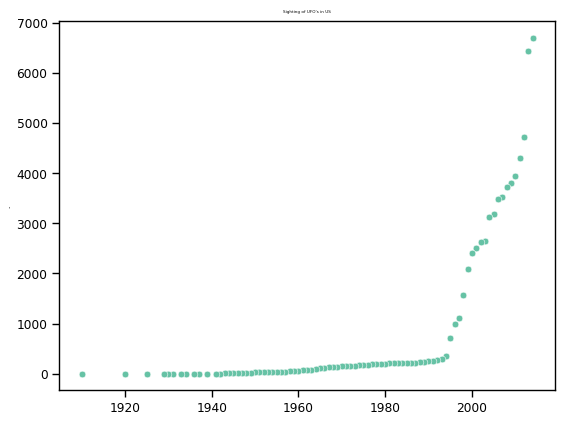

In [557]:
fig = sns.scatterplot(x=year_us, y=ycount_us).set(title="Sighting of UFO's in US")


In [558]:
type(ycount_non_us)

pandas.core.series.Series

In [559]:
ycount_non_us.head()

2003    775
2004    742
2012    658
2009    600
2013    598
Name: year, dtype: int64

In [560]:
df["us"].astype(int)
df["not_us"].astype(int)

0        1
1        0
2        0
3        1
4        0
        ..
80327    0
80328    0
80329    0
80330    0
80331    0
Name: not_us, Length: 80332, dtype: int64

In [561]:
df2 = pd.DataFrame()

df2["US"] = df_us["year"].value_counts()
df2["Not US"] = df_non_us["year"].value_counts()
df2["US"].astype(int)
df2["Not US"].isnull()
df2.fillna(value=0, inplace=True)



In [562]:
df2.isnull()

,US,Not US
2012,False,False
2013,False,False
2011,False,False
2008,False,False
2009,False,False
...,...,...
1933,False,False
1930,False,False
1929,False,False
1925,False,False


In [563]:
df2.head()

,US,Not US
2012,6699,658.0
2013,6439,598.0
2011,4720,387.0
2008,4291,529.0
2009,3941,600.0


In [564]:
df2.drop(2013, inplace=True)
df2.head()

,US,Not US
2012,6699,658.0
2011,4720,387.0
2008,4291,529.0
2009,3941,600.0
2010,3796,487.0


In [568]:
df2["US"].idxmax()

2012

In [569]:
df2.sort_index()

,US,Not US
1910,2,0.0
1920,1,0.0
1925,1,0.0
1929,1,0.0
1930,1,0.0
...,...,...
2009,3941,600.0
2010,3796,487.0
2011,4720,387.0
2012,6699,658.0


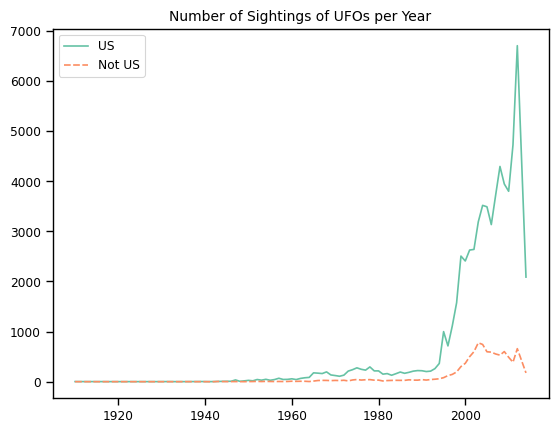

In [570]:
fig = sns.lineplot(data=df2)
_ = fig.set_title("Number of Sightings of UFOs per Year", fontdict={'size': 10})


[Text(0.5, 1.0, "Sightings of UFO's not in US")]

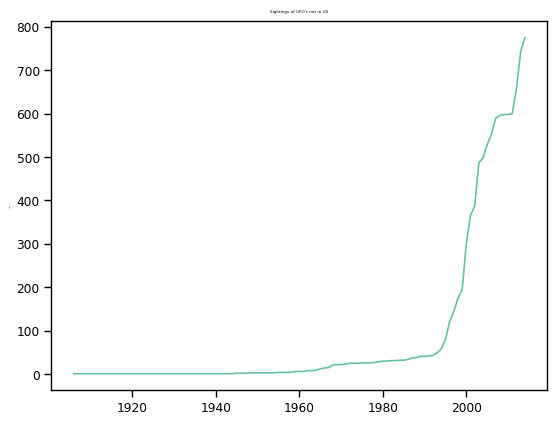

In [321]:
sns.lineplot(x=year_non_us, y=ycount_non_us).set(title="Sightings of UFO's not in US")

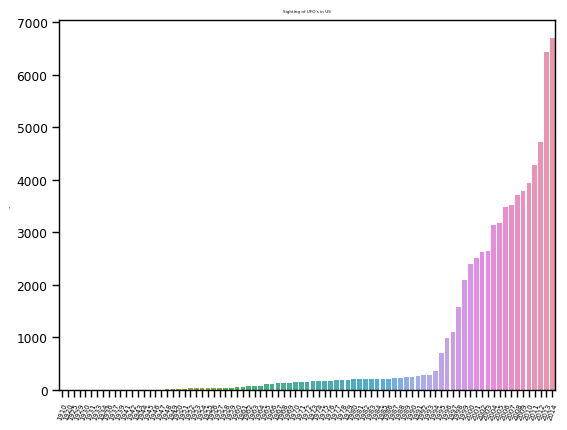

In [322]:

x = year_us
b = year_us[::-1]
fig = sns.barplot(x=x, y=ycount_us)
_ = fig.set(title="Sighting of UFO's in US")
_ = fig.set_xticklabels(b, fontsize=5, rotation=70)

In [286]:
fig, ax = plt.subplots()


_ = sns.barplot(x=x,y=ycount_us).set(title="Sighting of UFO's in US")

ax.xaxis.set_label_text('Year')
  

axins = inset_axes(ax,  "30%", "40%" ,loc="upper left", borderpad=3)

_ = sns.barplot(x=,y=ycount_us)



SyntaxError: invalid syntax (4199863405.py, line 11)

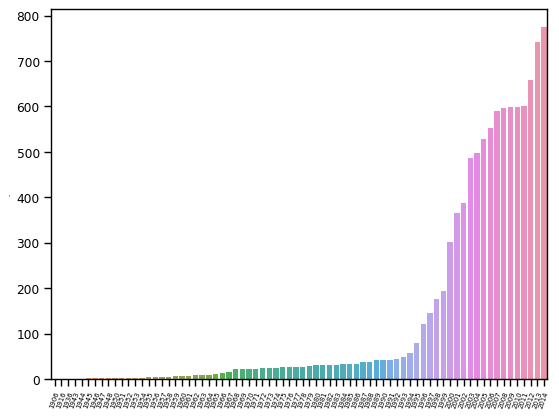

In [282]:
x = year_non_us
b = year_non_us[::-1]
fig = sns.barplot(x=x, y=ycount_non_us,)
_ = fig.set_xticklabels(b, fontsize=5, rotation=70)